**Problem statement**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
dataa=pd.read_csv('/content/gdrive/My Drive/bank_marketing_dataset.csv')

 **Columns description**   
  
* 1 - age (numeric)
* 2-job:type(categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4-education(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has a housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has a personal loan? (categorical: 'no','yes','unknown')
Related with the last contact of the current campaign:
* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
* 10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
Other attributes:
* 11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 12 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 13 - previous: number of contacts performed before this campaign and for this client (numeric)
* 14 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes:
* 15 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 16 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 17 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 18 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 19 - nr.employed: number of employees - quarterly indicator (numeric)
* 20 - subscribed : has the client subscribed a term deposit? (binary: 'yes','no')


# DATA UNDERSTANDING

In [ ]:
dataa.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41165 non-null  float64
 11  pdays           41157 non-null  float64
 12  previous        41168 non-null  float64
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
dataa.shape

(41188, 20)

In [ ]:
dataa.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41165.000000,41157.000000,41168.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.568395,962.447943,0.172853,0.101814,93.618865,-40.507000,3.647593,5164.994795
std,10.42125,2.770567,186.978599,0.494731,2.600404,2.644491,4.652951,2.213519,123.313419
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-98.600000,0.634000,79.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,402.000000,400.234000,-26.900000,99.400000,5228.100000


In [ ]:
dataa.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
s =dataa.duplicated().sum()

In [ ]:
s

1768

In [ ]:
data=dataa.drop_duplicates() #Droping the duplicates

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['subscribed'].value_counts()

no     34822
yes     4598
Name: subscribed, dtype: int64

In [ ]:
data.shape

(39420, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39420 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39420 non-null  int64  
 1   job             39420 non-null  object 
 2   marital         39420 non-null  object 
 3   education       39420 non-null  object 
 4   default         39420 non-null  object 
 5   housing         39420 non-null  object 
 6   loan            39420 non-null  object 
 7   contact         39420 non-null  object 
 8   month           39420 non-null  object 
 9   day_of_week     39420 non-null  object 
 10  campaign        39397 non-null  float64
 11  pdays           39389 non-null  float64
 12  previous        39400 non-null  float64
 13  poutcome        39420 non-null  object 
 14  emp.var.rate    39420 non-null  float64
 15  cons.price.idx  39420 non-null  float64
 16  cons.conf.idx   39420 non-null  float64
 17  euribor3m       39420 non-null 

In [ ]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39420.000000,39397.000000,39389.000000,39400.000000,39420.000000,39420.000000,39420.000000,39420.000000,39420.000000
mean,40.113876,2.619007,960.807281,0.178579,0.085036,93.622689,-40.502628,3.628942,5163.859001
std,10.460495,2.814957,190.964969,0.502930,2.640956,2.701399,4.670342,2.238943,125.390305
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-98.600000,0.634000,79.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,402.000000,400.234000,-26.900000,99.400000,5228.100000


In [ ]:
data.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed
count,39420,39420,39420,39420,39420,39420,39420,39420,39420,39420,39420
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9882,23876,11564,31149,20566,32262,24680,13324,8199,33873,34822


Domain Analysis:

it is a classification problem.The target column is subscribed

**EDA and Data analysis**

<Axes: xlabel='subscribed', ylabel='count'>

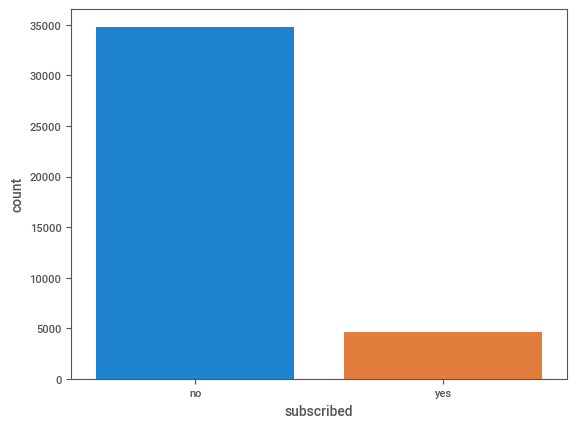

In [ ]:
sns.countplot(x=data['subscribed'])

we can see that data is imbalanced

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 45.0 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv#importing sweetviz library
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



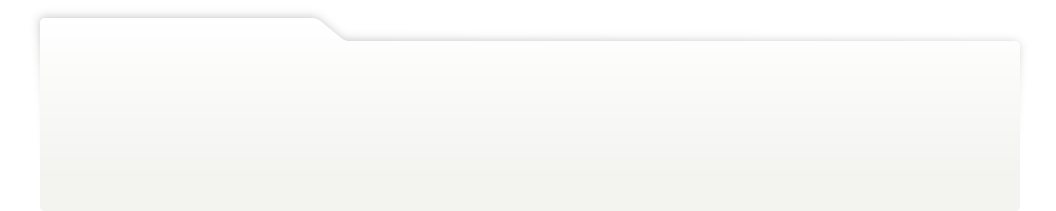
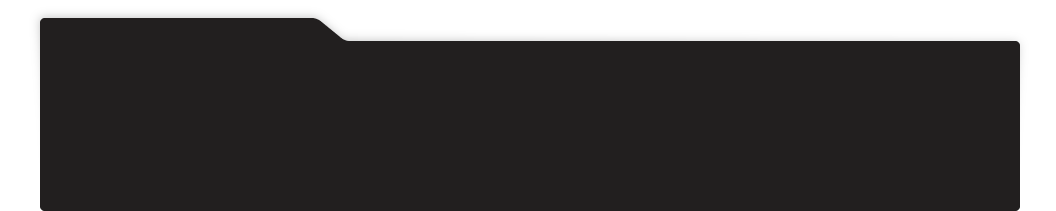
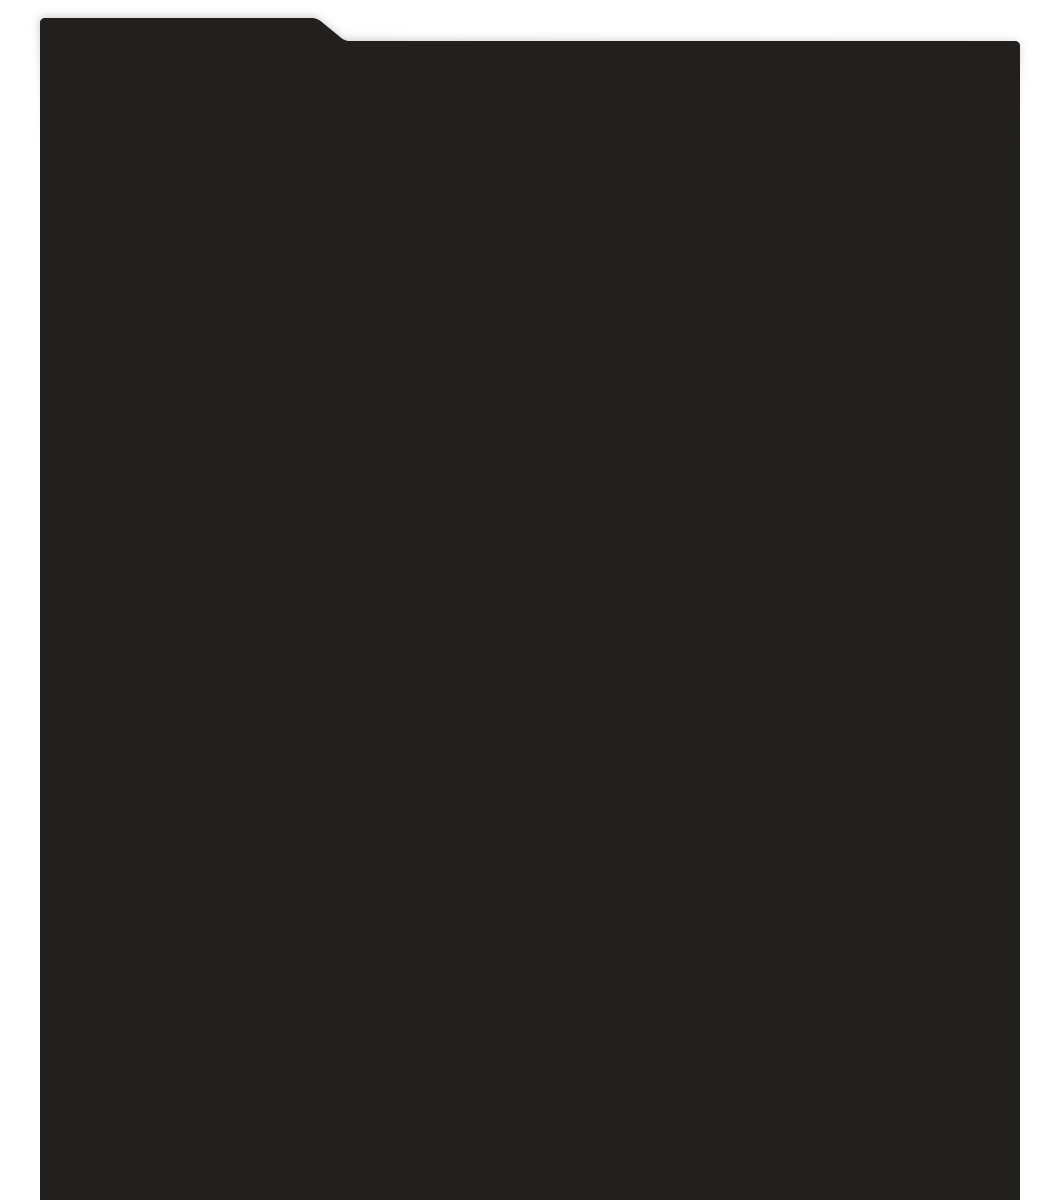
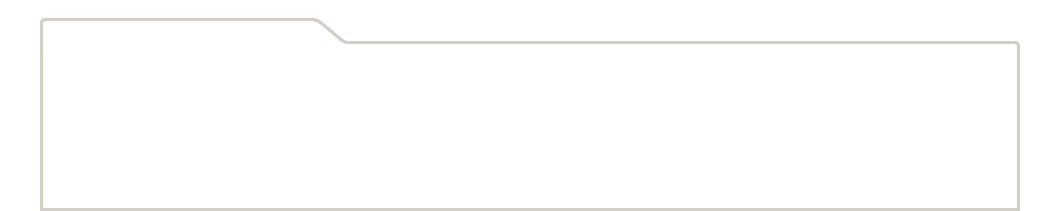
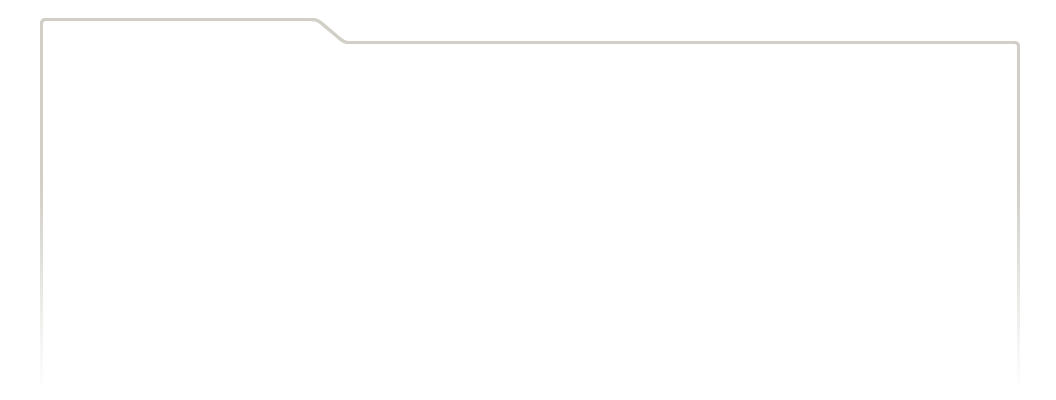
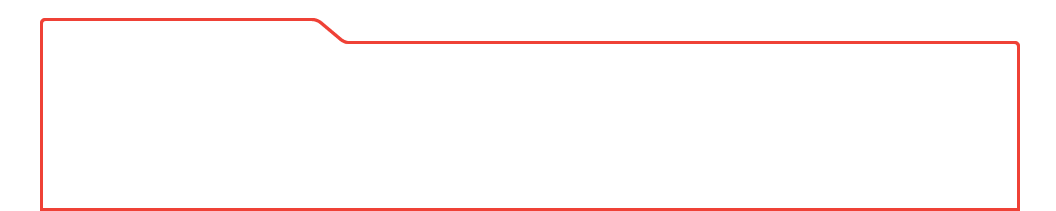
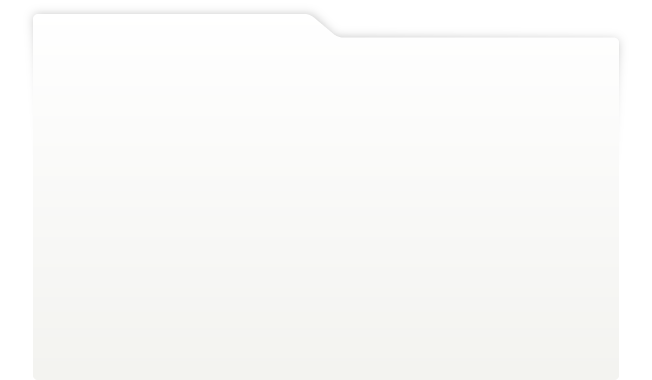
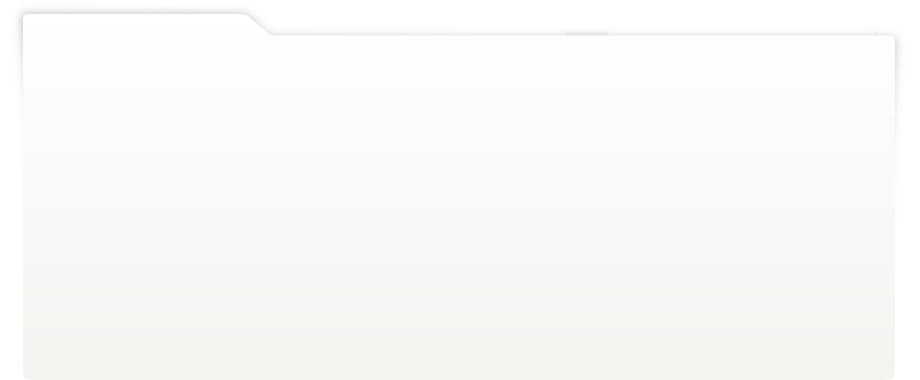
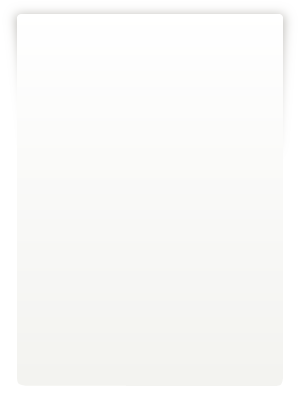
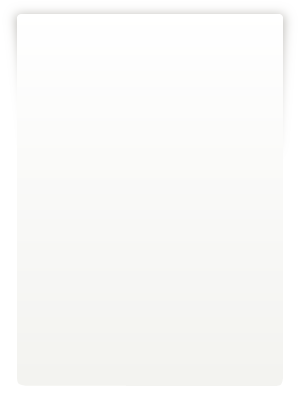
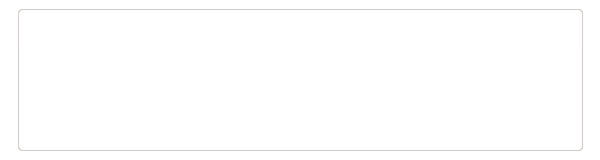
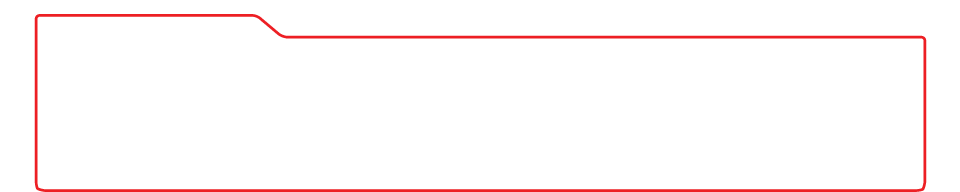
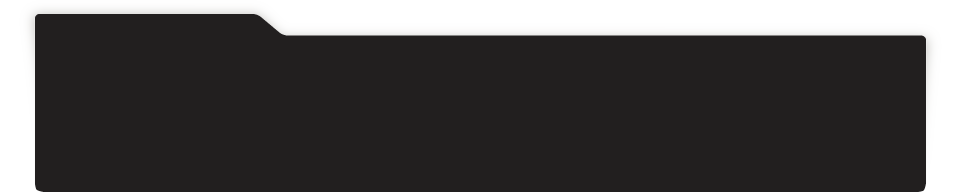
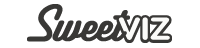
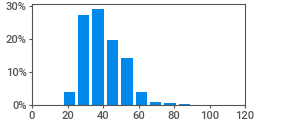
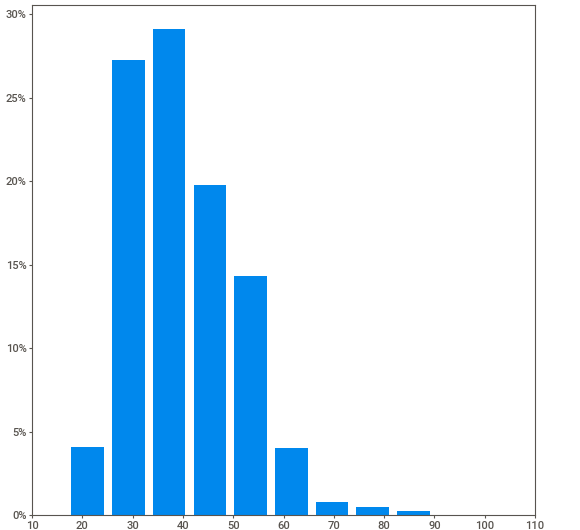
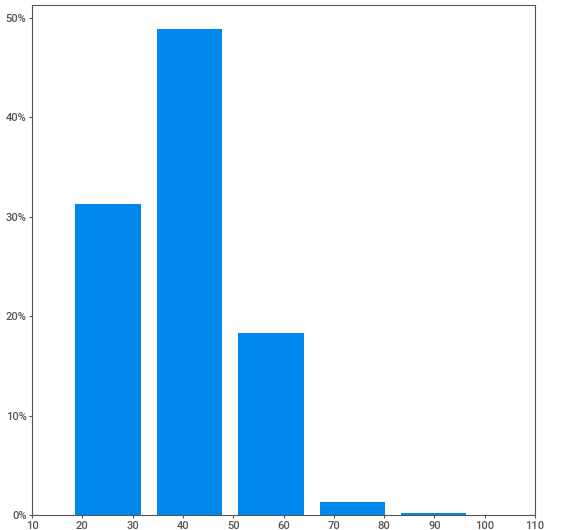
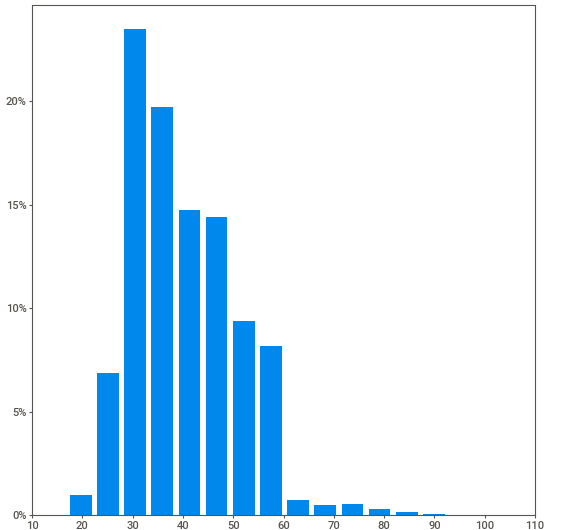
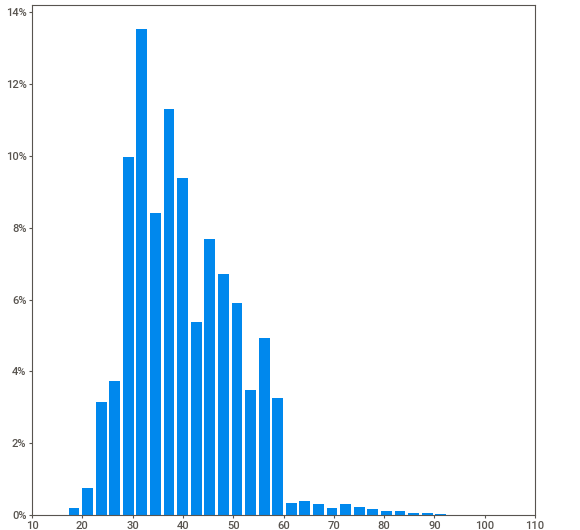
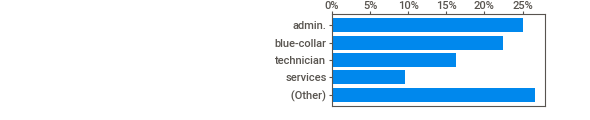
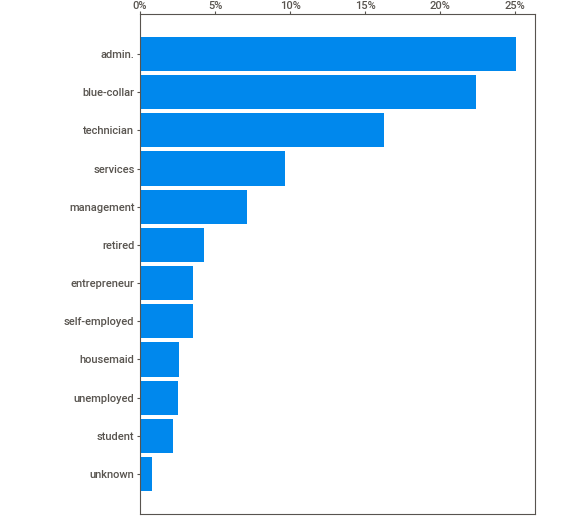
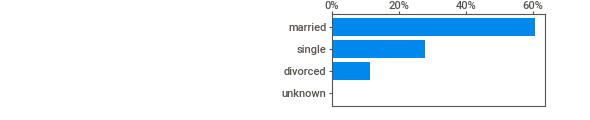
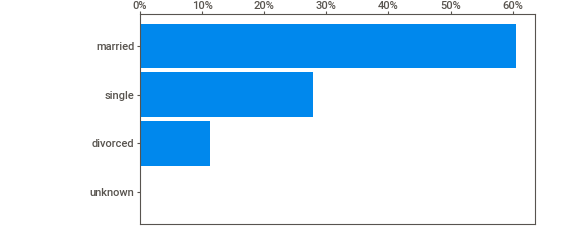
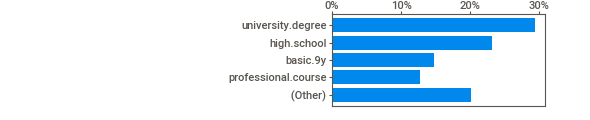
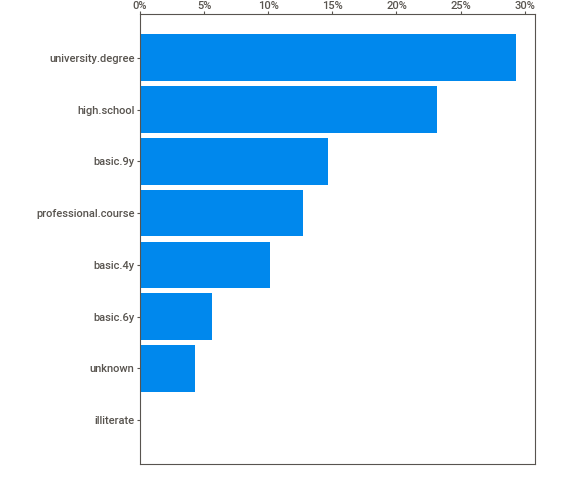
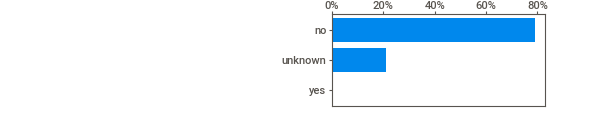
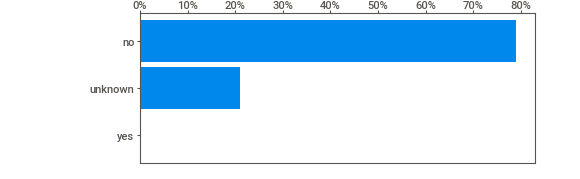
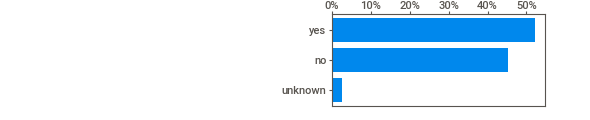
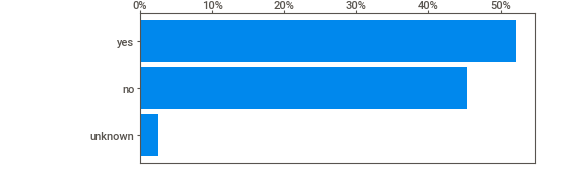
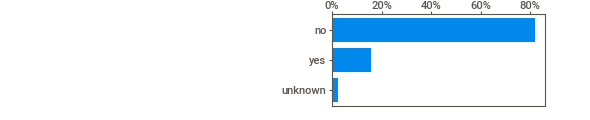
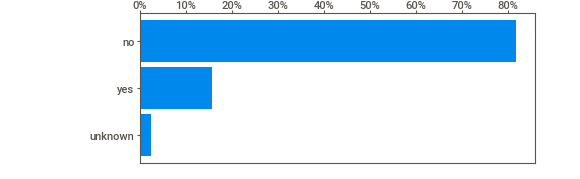
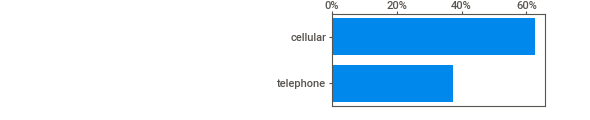
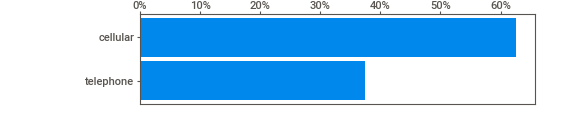
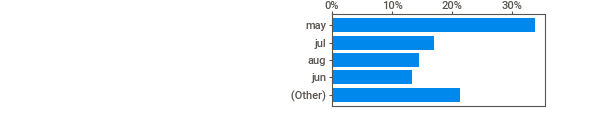
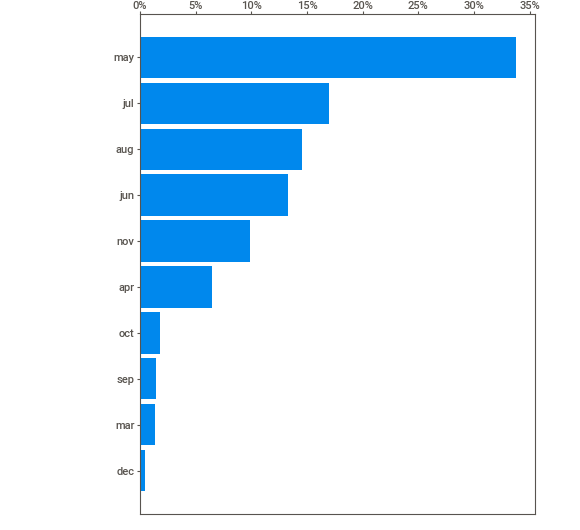
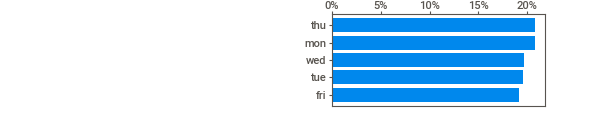
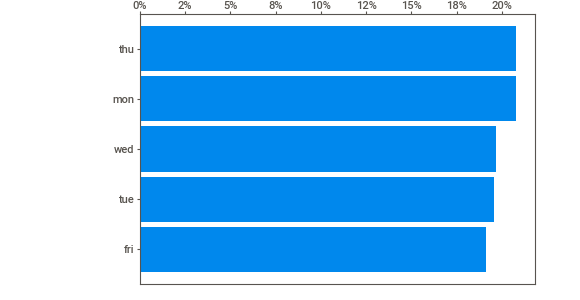
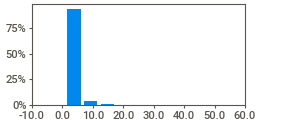
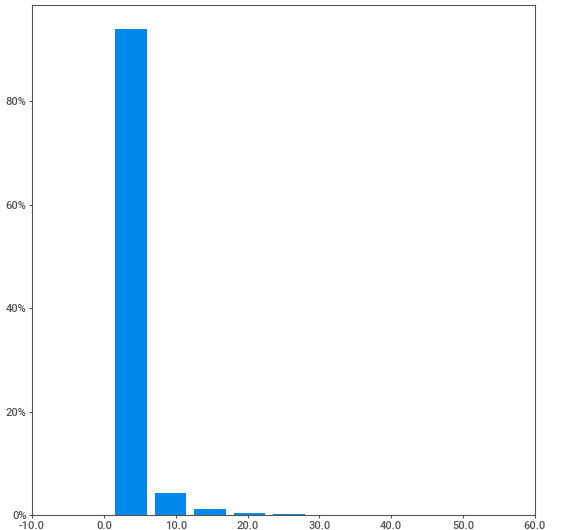
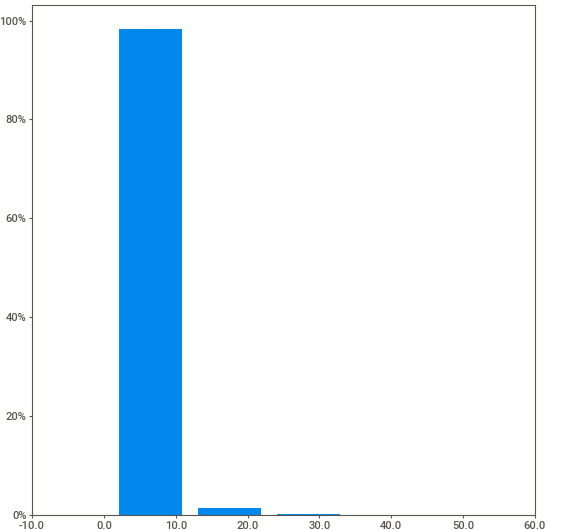
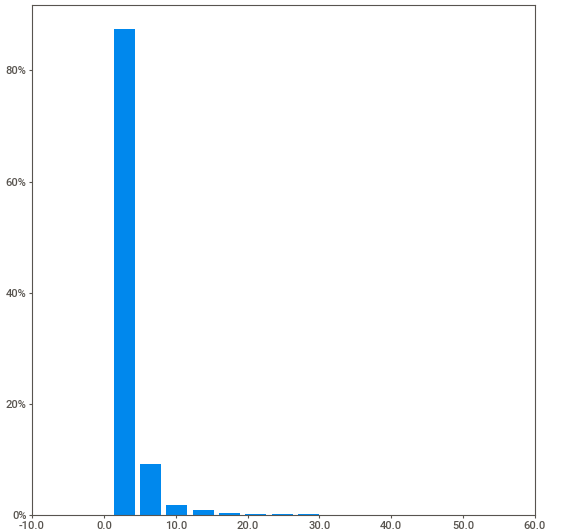
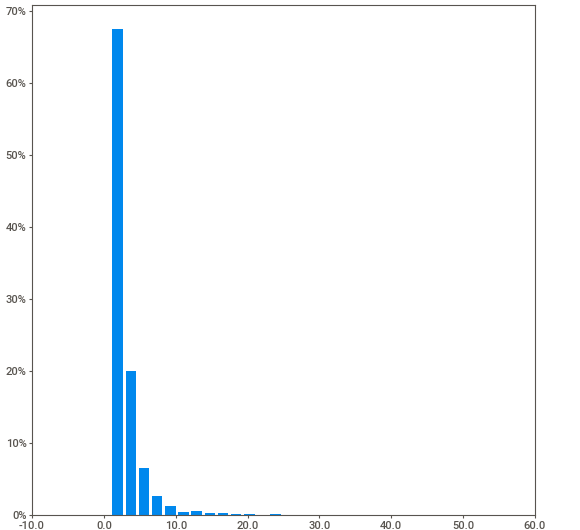
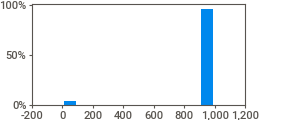
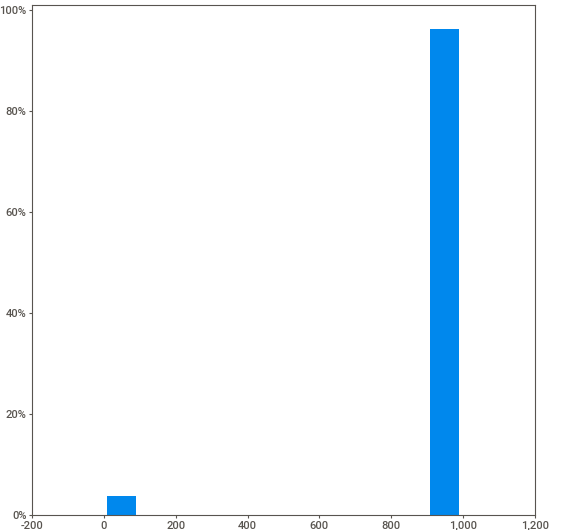
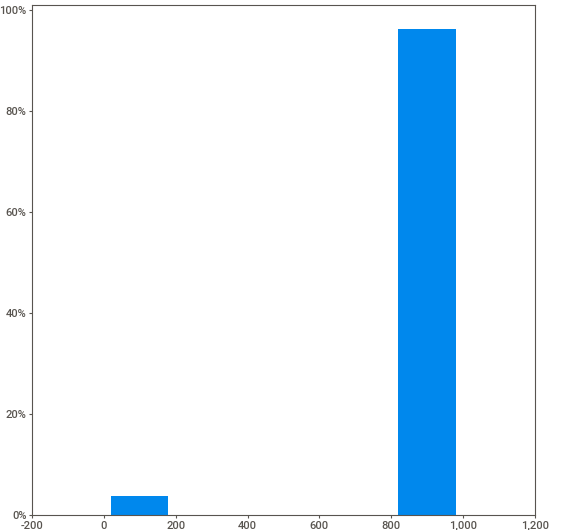
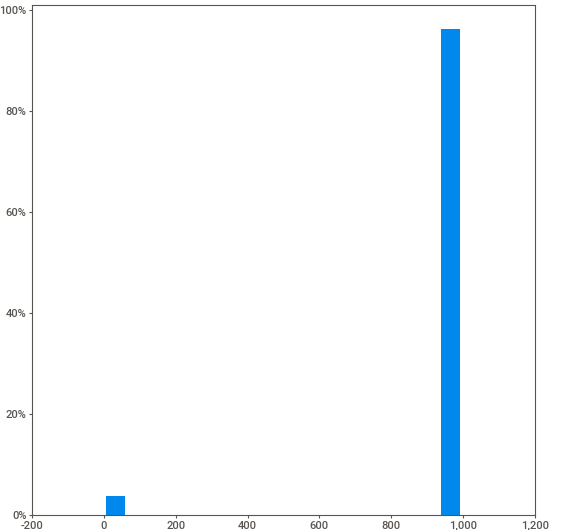
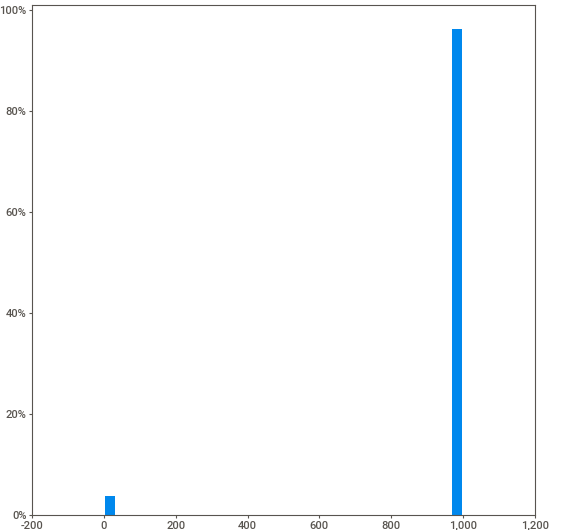
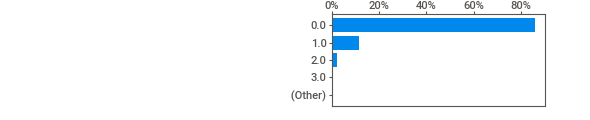
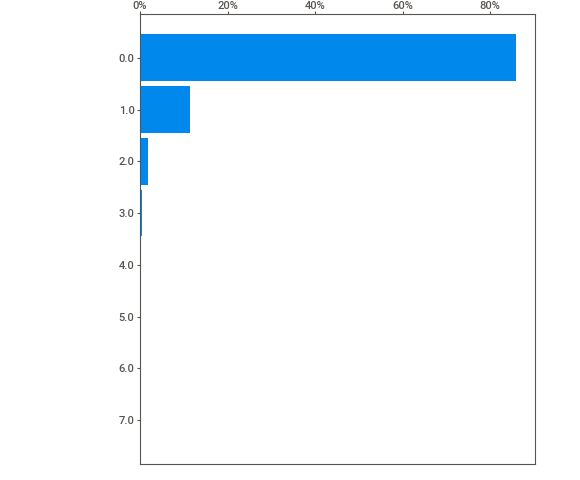
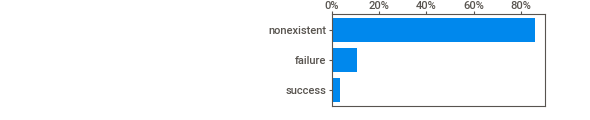
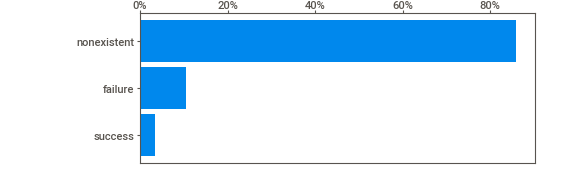
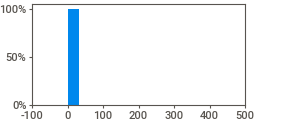
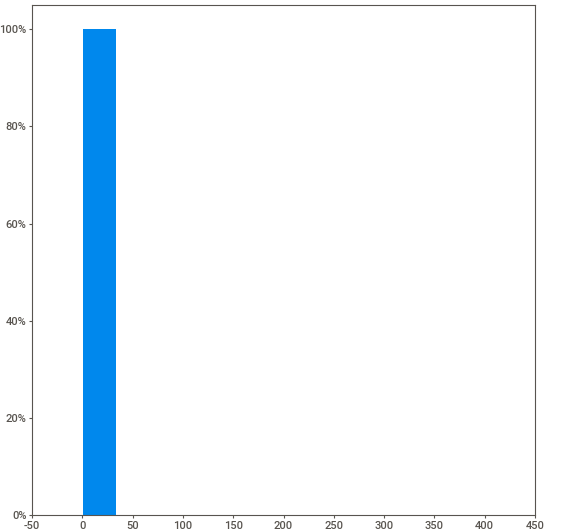
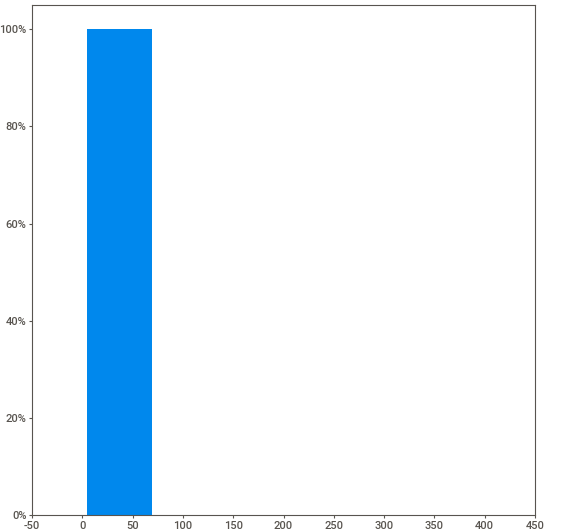
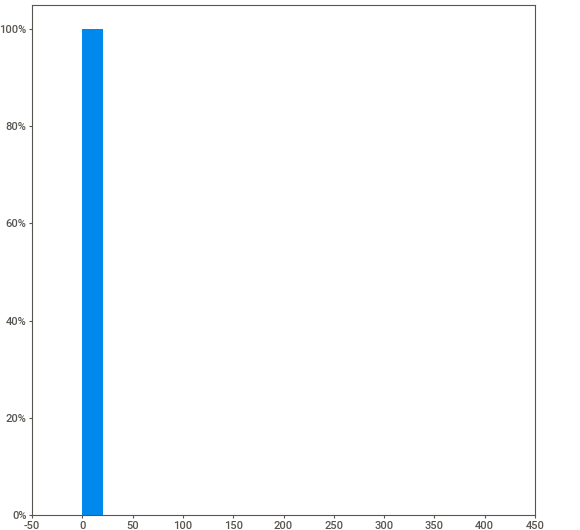
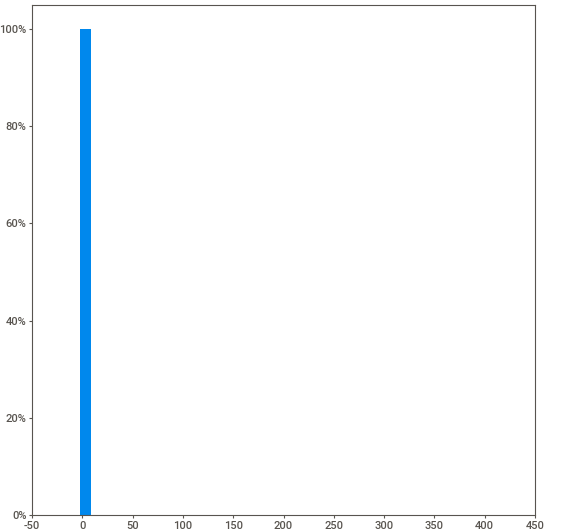
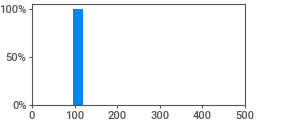
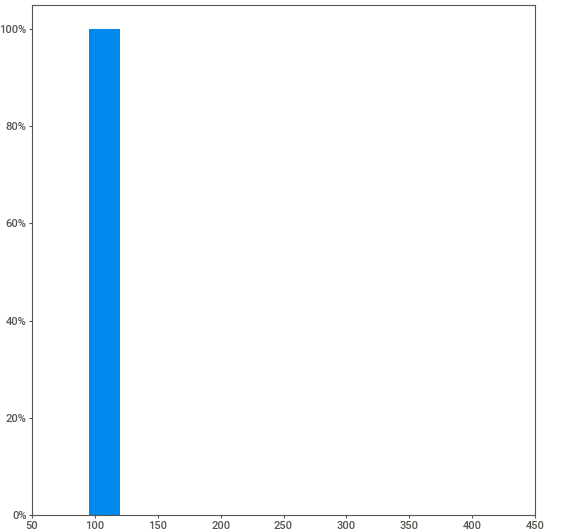
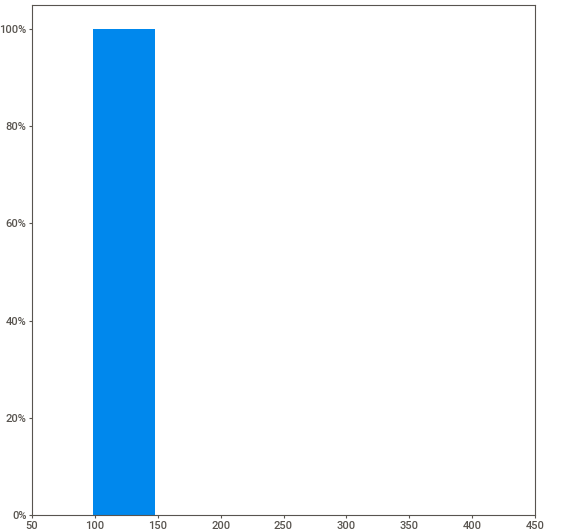
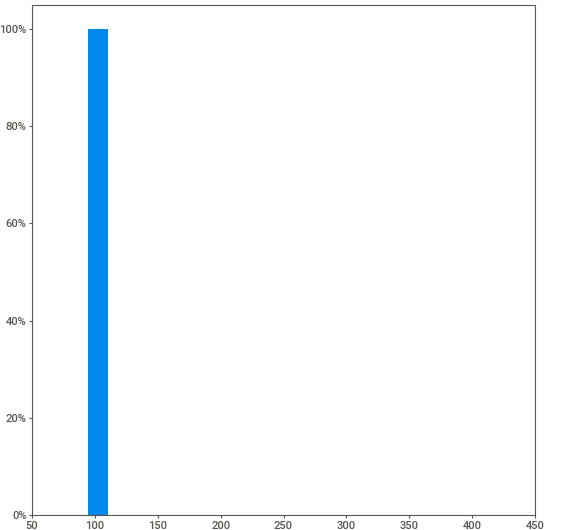
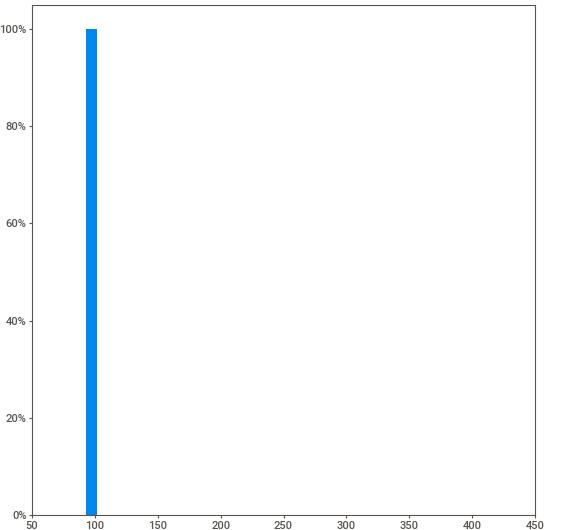
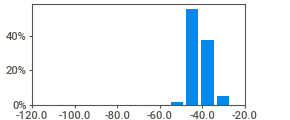
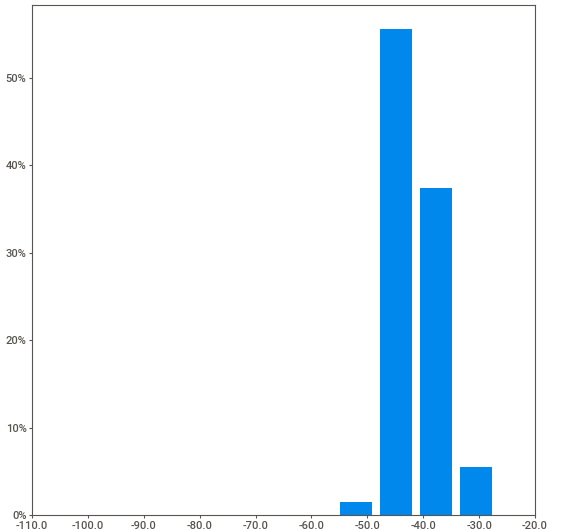
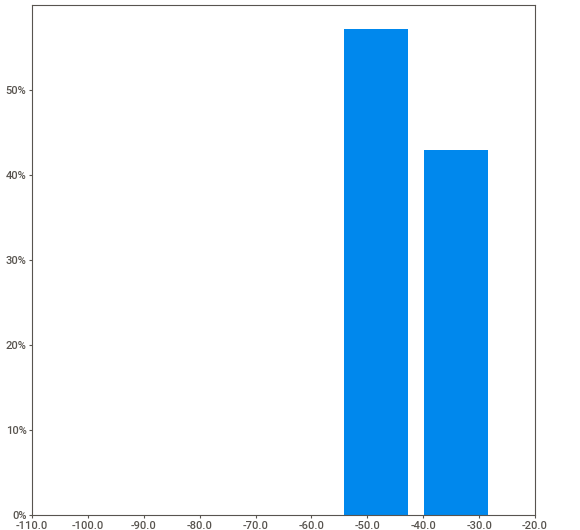
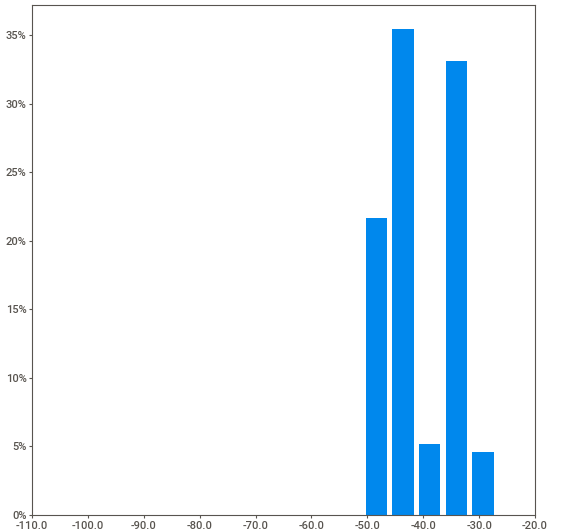
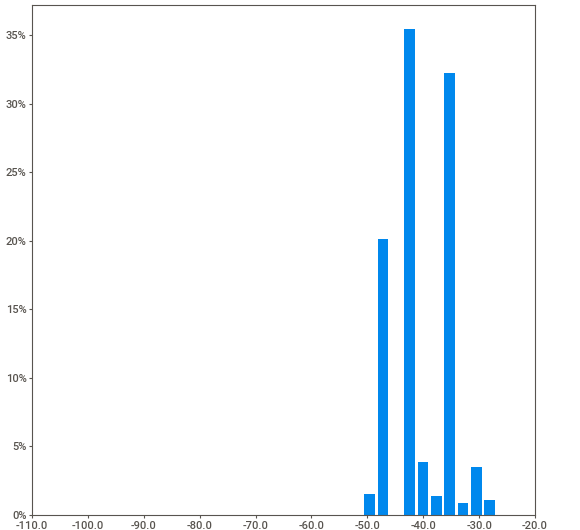
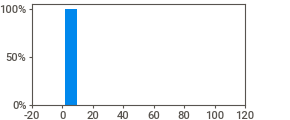
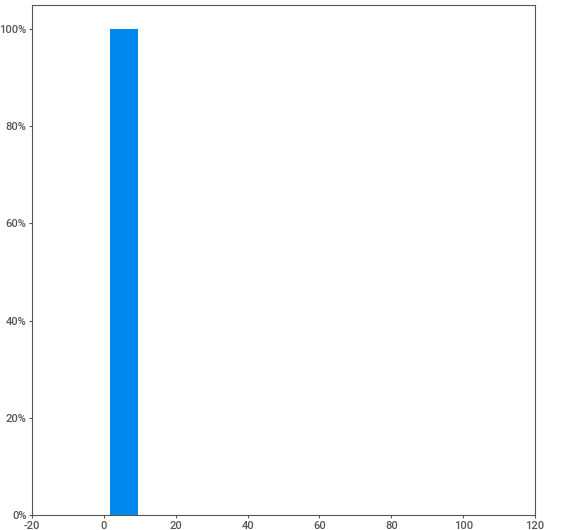
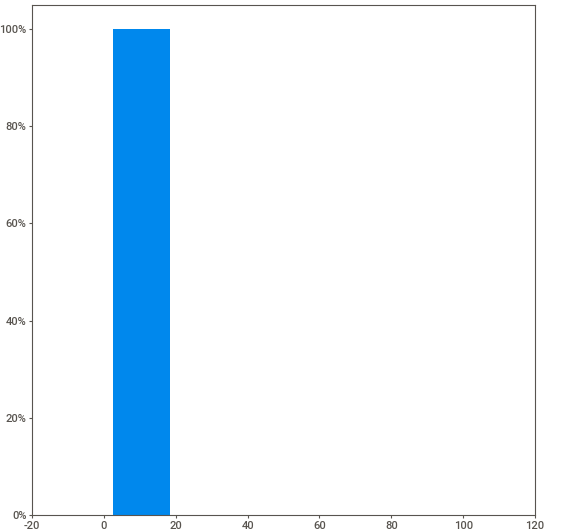
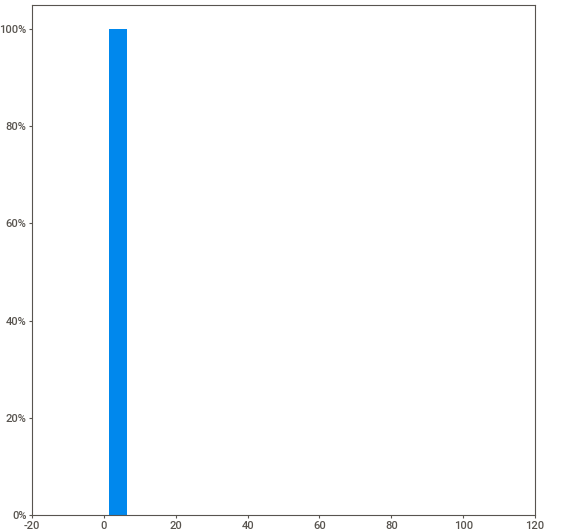
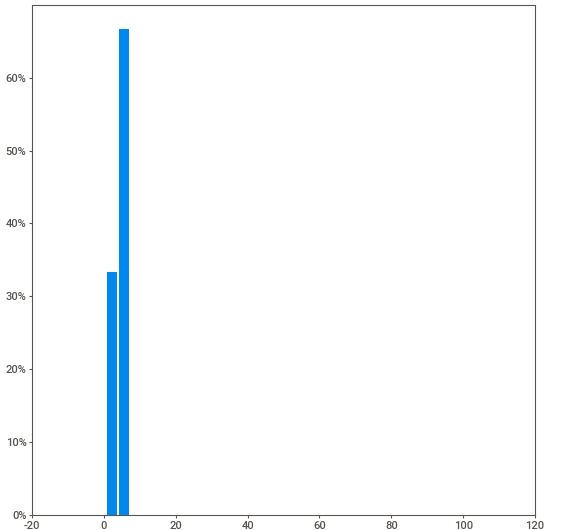
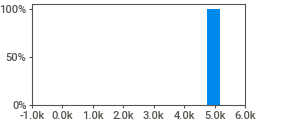
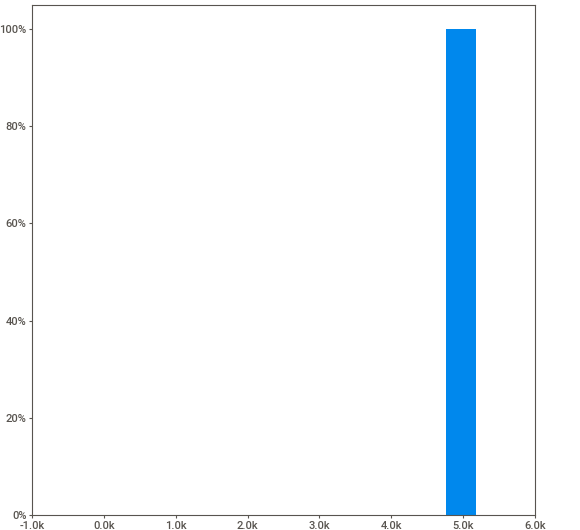
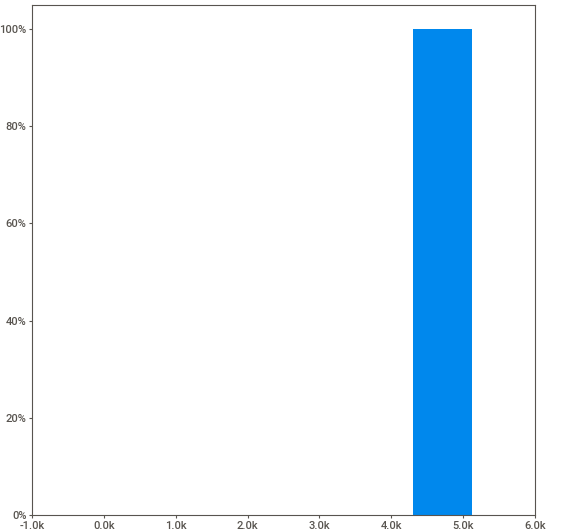
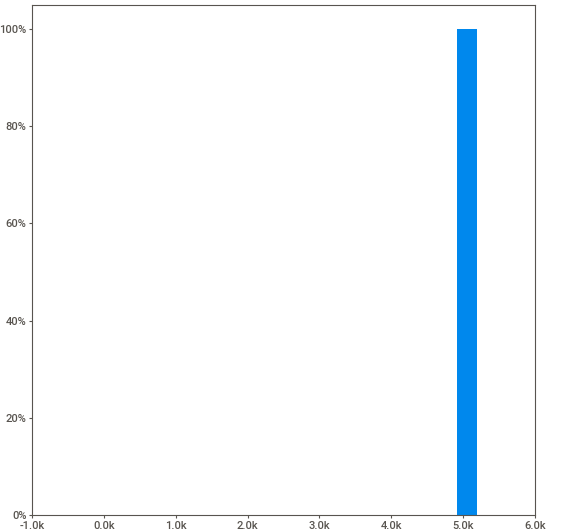
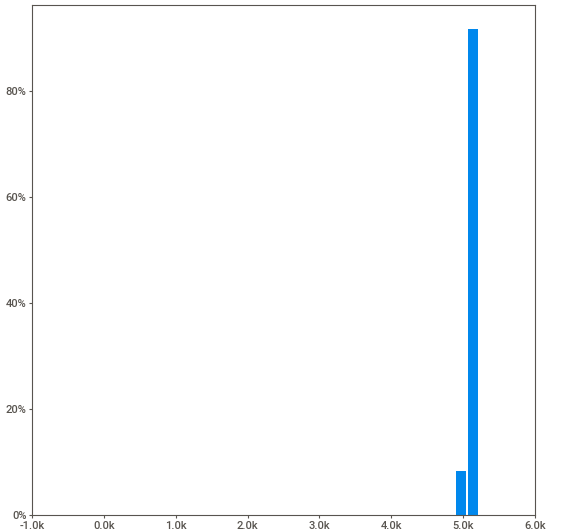
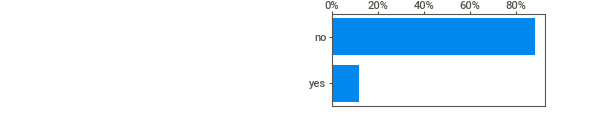
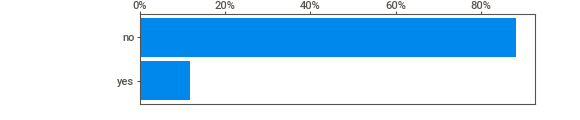
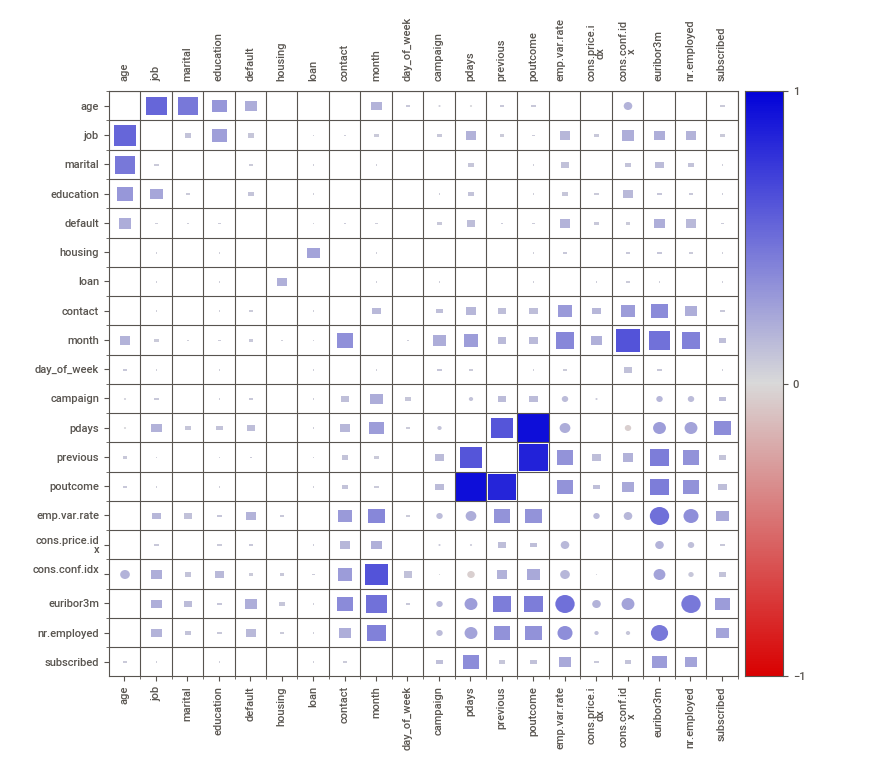
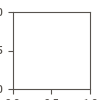

Report '/content/SWEETVIZ_REPORT.html' was saved to storage.


In [ ]:
my_report.show_notebook(w=None, h=None,scale=None,
                         layout='vertical',
                          filepath='/content/SWEETVIZ_REPORT.html')

* age right skewed
* 79% doesn't have credit in bank
* 52% person have housing loan
* only 16% have personal loan
* most frequent values for campaign is 1 and 2 ;41.5%  and 25.9% respectively
* 96.2%  contacted clients are new to the campaign call;means client was not previously contacted(pdays)
* 86% contact number is new. Even before this campaign there is no communication with that contacts
* Poutcome: outcome of the previous marketing campaign are ,
     
     failure:11%,nonexistent:86%,success:3%
* Most of the customers are administrative workers,blue-collar workers and technicians
* 61% contacted clients are married
* Most of the customers are from age group of 20-40


In [ ]:
num_data=data.select_dtypes(include=["float64","int64"])
print("numerical colums",num_data.columns)

numerical colums Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


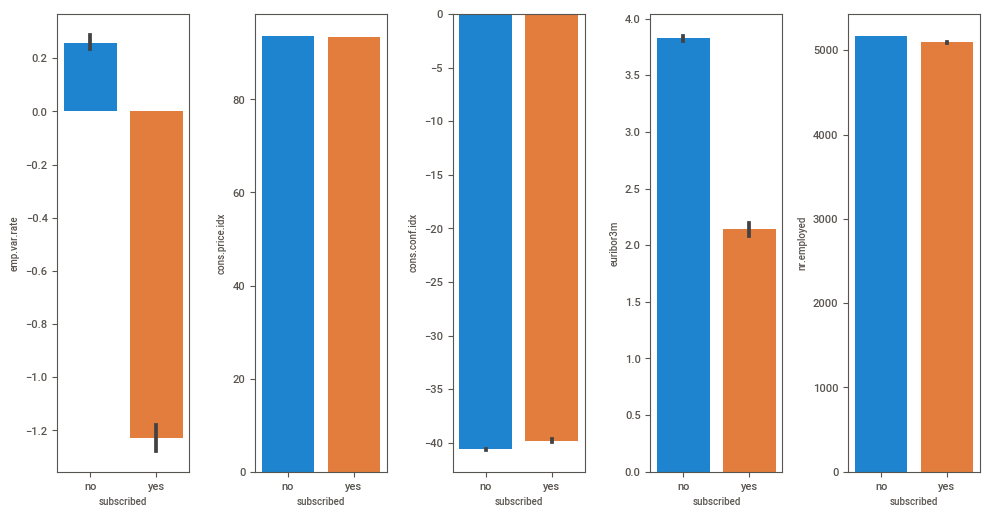

In [ ]:
ndata=data[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
plt.figure(figsize = (10,10))
a=1
for i in (ndata):
  if(a<=10):
         ax=plt.subplot(2,5,a)
         sns.barplot(y=ndata[i],x=data.subscribed)
         plt.ylabel(i,fontsize=7)
         plt.xlabel("subscribed",fontsize=7)
  a+=1
plt.tight_layout()

In [ ]:
num_data.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],axis=1,inplace=True)

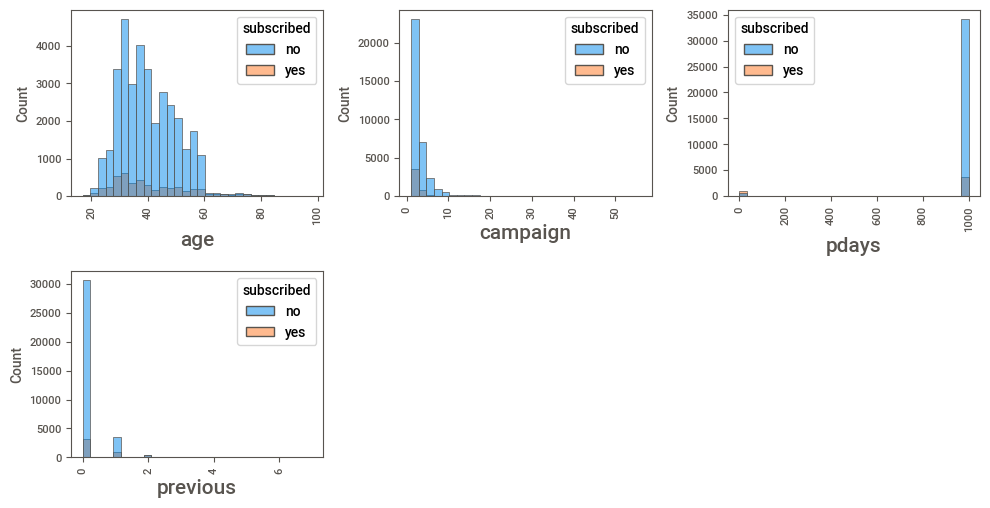

In [ ]:

plt.figure(figsize=(10,10))
plotnumber = 1

for column in num_data:
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(data=data,x=num_data[column],hue="subscribed",bins=30)
        #plt.xlabel('subscribed',fontsize=15)
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

In [ ]:
cat_data=data.select_dtypes(include=["O"])
print("numerical colums",cat_data.columns)

numerical colums Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'subscribed'],
      dtype='object')


In [ ]:
cat_data.drop('subscribed',axis=1,inplace=True)

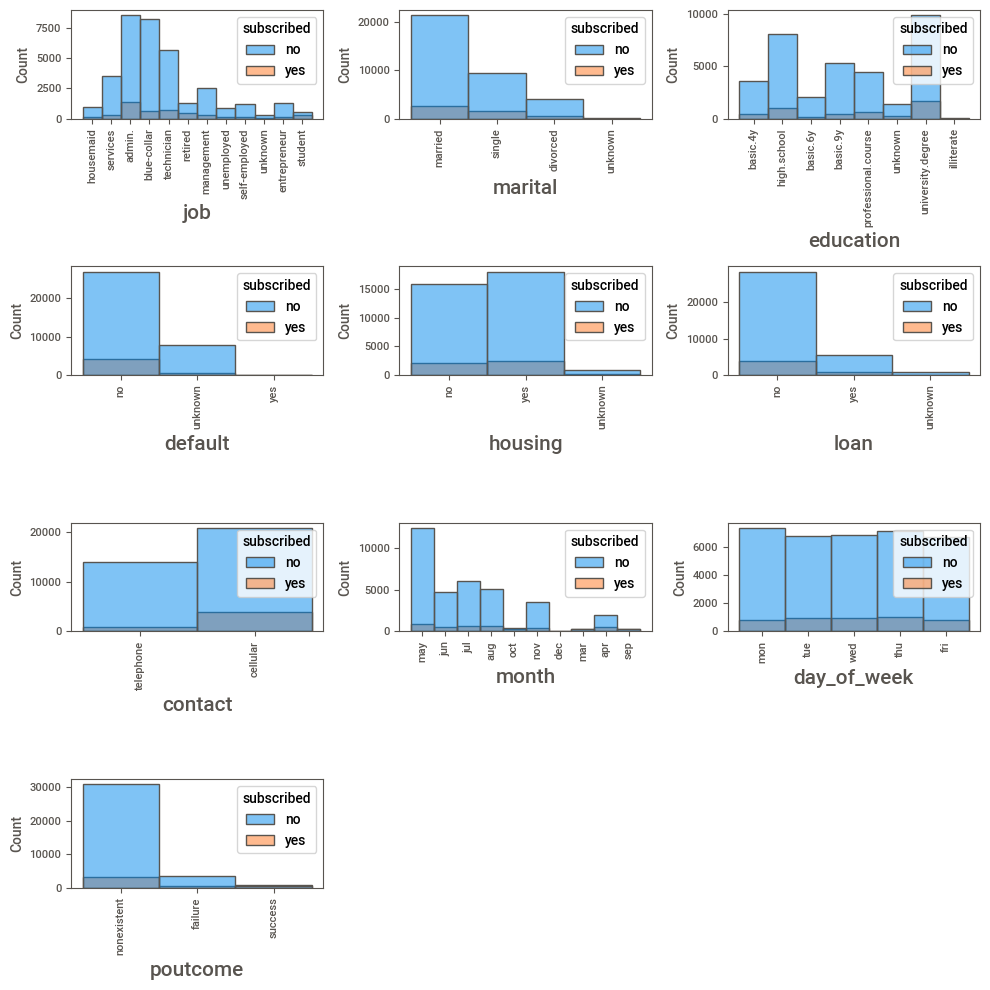

In [ ]:

plt.figure(figsize=(10,10))
plotnumber = 1

for column in cat_data:
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(hue=data.subscribed,x=cat_data[column])
        #plt.xlabel('subscribed',fontsize=15)
        plt.xlabel(column,fontsize=15)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

* Campaign doesn't influence the customer to subscrbing the term deposit.
* day_of_week,poutcome,month have no influence on target.so we can drop these columns

# Data **preprocessing**

Handling with missing values

In [ ]:
data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
campaign          23
pdays             31
previous          20
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
subscribed         0
dtype: int64

In [ ]:
data.campaign.fillna(data['campaign'].median(),inplace=True)
data.pdays.fillna(data['pdays'].median(),inplace=True)
data.previous.fillna(data['previous'].median(),inplace=True)

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

Outlier detection

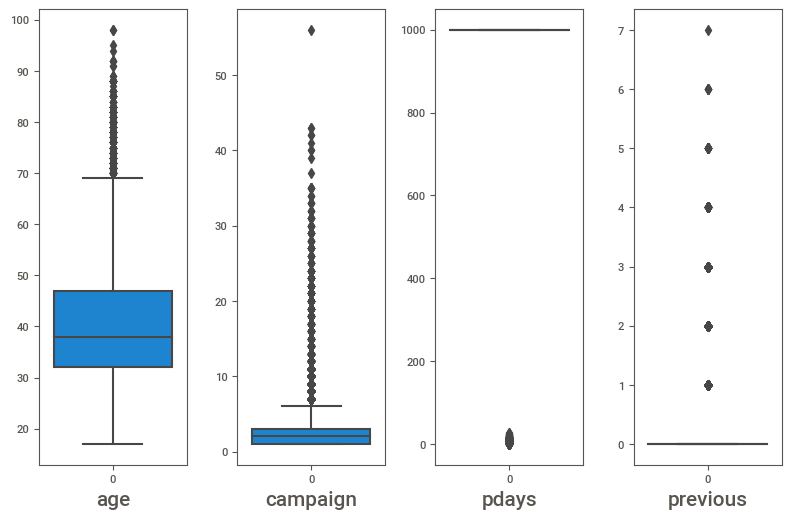

In [ ]:
plt.figure(figsize=(10,10),facecolor='white')

plotnumber=1

for column in num_data:
    if plotnumber<=10 :
        ax=plt.subplot(2,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

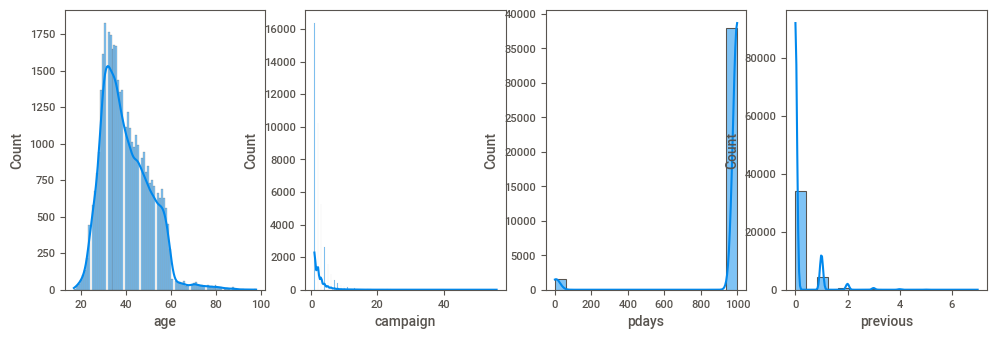

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))
plt_num = 1
for i in num_data:
  if plt_num <= 10:
        plt.subplot(2,5,plt_num)
        sns.histplot(x=i, data=data,kde=True)
  plt_num += 1
plt.show()
plt.tight_layout()

In [ ]:
from scipy import stats

In [ ]:
for i in num_data:
         IQR = stats.iqr(num_data[i], interpolation = 'midpoint')
         Q1 = num_data[i].quantile(0.25)
         Q3 =num_data[i].quantile(0.75)
         min_limit=Q1 - 1.5*IQR
         max_limit=Q3 +1.5*IQR
         print(i)
         print('lwlmt',min_limit)
         print('uplmt',max_limit)
         print('percentage of uplmt',len(num_data.loc[num_data[i] > max_limit])/len(data)*100)
         print('percentage of lwlmt',len(num_data.loc[num_data[i] < min_limit])/len(data)*100)
         s= len(num_data.loc[num_data[i] > max_limit])/len(data)*100 + len(num_data.loc[num_data[i] < min_limit])/len(data)*100
         print('outlier percentage:',s)
         if s<=5.0:
          print("median is {}".format( data[i].median()))
          data.loc[data[i]<min_limit,i]=data[i].median()
          data.loc[data[i]>max_limit,i]=data[i].median()
         print("**********************")

age
lwlmt 9.5
uplmt 69.5
percentage of uplmt 1.1618467782851345
percentage of lwlmt 0.0
outlier percentage: 1.1618467782851345
median is 38.0
**********************
campaign
lwlmt nan
uplmt nan
percentage of uplmt 0.0
percentage of lwlmt 0.0
outlier percentage: 0.0
median is 2.0
**********************
pdays
lwlmt nan
uplmt nan
percentage of uplmt 0.0
percentage of lwlmt 0.0
outlier percentage: 0.0
median is 999.0
**********************
previous
lwlmt nan
uplmt nan
percentage of uplmt 0.0
percentage of lwlmt 0.0
outlier percentage: 0.0
median is 0.0
**********************


Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data['subscribed']=le.fit_transform(data['subscribed'])
data['education']=le.fit_transform(data['education'])
data['job']=le.fit_transform(data['job'])
data['marital']=le.fit_transform(data['marital'])
data['housing']=le.fit_transform(data['housing'])
data['loan']=le.fit_transform(data['loan'])
data['contact']=le.fit_transform(data['contact'])
data['month']=le.fit_transform(data['month'])
data['day_of_week']=le.fit_transform(data['day_of_week'])
data['poutcome']=le.fit_transform(data['poutcome'])
data['default']=le.fit_transform(data['default'])


In [ ]:
print(le.classes_)

['no' 'unknown' 'yes']


Since 11 features of our dataset consists of categorical values, we have imported LabelEncoder from sklearn and converted these features into numerical values


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,3,1,0,0,0,0,1,6,1,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


Feature reduction and selection

In [ ]:
corr=data.corr()

<Axes: >

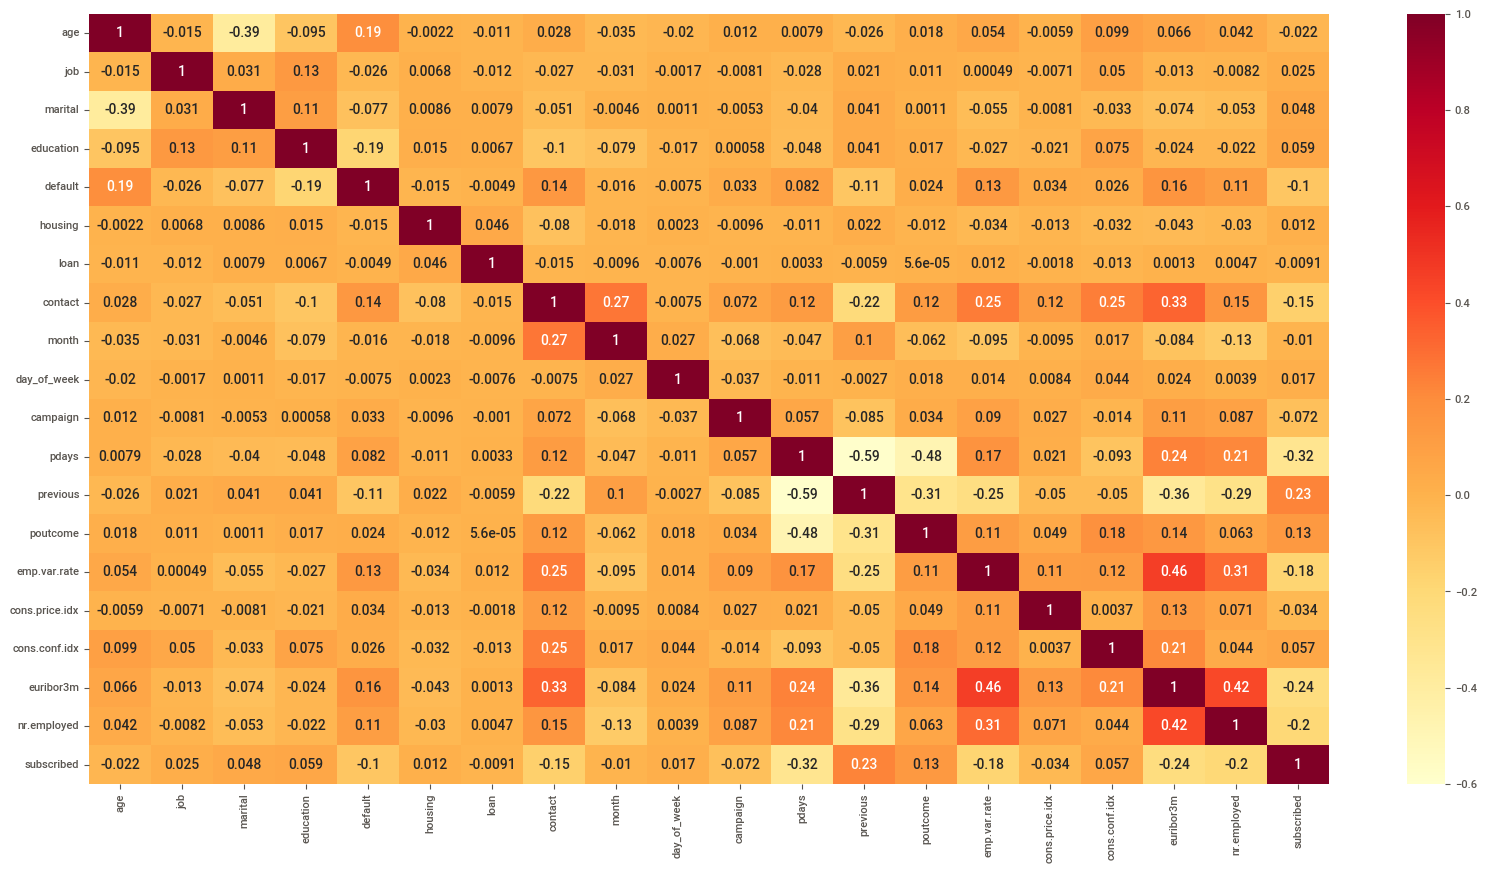

In [ ]:
plt.subplots(figsize=(20,10))
sns.heatmap(corr,vmin=-0.60,vmax=1,annot=True,cmap='YlOrRd')

 droped columns are poutcome,day_of_week,month

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,3,1,0,0,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,5,1,5,0,2,0,0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
data=data.drop(['poutcome','day_of_week','month'],axis=1,inplace=True)
data.head()


,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,3,1,0,0,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
data=data

In [ ]:
data


,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,3,1,0,0,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,38,5,1,5,0,2,0,0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
data.to_csv('Bank_marketing_prepro.csv')

In [4]:
data=pd.read_csv('/content/gdrive/My Drive/Bank_marketing_prepro.csv')

In [5]:
data

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,0,56,3,1,0,0,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
1,1,57,7,1,3,1,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
2,2,37,7,1,3,0,2,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
3,3,40,0,1,1,0,0,0,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
4,4,56,7,1,3,0,0,2,1,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39415,41183,38,5,1,5,0,2,0,0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,1
39416,41184,46,1,1,5,0,0,0,0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,0
39417,41185,56,5,1,6,0,2,0,0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,0
39418,41186,44,9,1,5,0,0,0,0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6,1


In [6]:
from sklearn.preprocessing import StandardScaler
stanscale=StandardScaler()
stdf=stanscale.fit_transform(data.drop(['subscribed'],axis=1))

In [7]:
x=stdf
y=data['subscribed']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=3)
print(x_train.shape)
print(x_test.shape)

(29565, 17)
(9855, 17)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier





In [10]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score, roc_auc_score

In [11]:
#  function to train and test model
def train_test_model(model, model_name, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')
    cf=confusion_matrix(y_test,y_pred)

    model_eval = pd.DataFrame({'Accuracy': [accuracy],
                                'Precision': [precision],
                                'Recall': [recall],
                                'F1 Score': [f1],
                                 'confusion_matrix':[cf]},
                                   index=[model_name])

    return model_eval

Finding neighbors size in KNN Classifier

In [ ]:
# create empty list to store error values
error_rate=[]

for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.15819381024860477,
 0.11405377980720446,
 0.12014205986808726,
 0.10898021308980213,
 0.1097919837645865,
 0.10481988838153222,
 0.1054287163876205,
 0.10319634703196347,
 0.10471841704718417,
 0.10126839167935059]

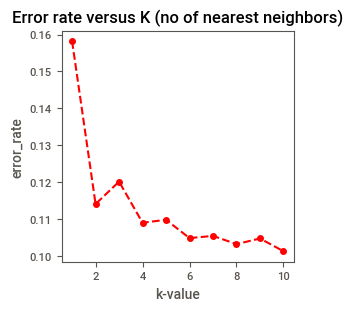

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

n_neighbors=10

In [ ]:
# create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'SVM': SVC(kernel='linear'),
    'SVM_POLY' : SVC(kernel='poly'),
    'SVM_rbf' : SVC(kernel='rbf'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'xgb':XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
}

# train and test models
models_eval = pd.DataFrame()
for model_name, model in models.items():
    models_eval = models_eval.append(train_test_model(model, model_name, x_train, x_test, y_train, y_test))

In [ ]:
models_eval

,Accuracy,Precision,Recall,F1 Score,confusion_matrix
Logistic Regression,0.900964,0.886164,0.900964,0.877801,"[[8614, 104], [872, 265]]"
KNN,0.898732,0.880985,0.898732,0.877549,"[[8576, 142], [856, 281]]"
SVM,0.898427,0.883283,0.898427,0.871279,"[[8635, 83], [918, 219]]"
SVM_POLY,0.900355,0.884199,0.900355,0.878621,"[[8594, 124], [858, 279]]"
SVM_rbf,0.900355,0.884199,0.900355,0.878621,"[[8594, 124], [858, 279]]"
Naive Bayes,0.849721,0.864201,0.849721,0.856271,"[[7848, 870], [611, 526]]"
Decision Tree,0.830036,0.840753,0.830036,0.835137,"[[7795, 923], [752, 385]]"
Random Forest,0.893354,0.875986,0.893354,0.880200,"[[8437, 281], [770, 367]]"
xgb,0.899340,0.883265,0.899340,0.885460,"[[8488, 230], [762, 375]]"
Gradient Boosting,0.902588,0.888026,0.902588,0.882039,"[[8597, 121], [839, 298]]"


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minscale=MinMaxScaler()
mindf=minscale.fit_transform(data.drop(['subscribed'],axis=1))

In [ ]:
x_min=mindf
x_min.shape

(39420, 16)

In [ ]:
#minmax scaled data split
xmin=mindf
xmin_train,xmin_test,y_train,y_test=train_test_split(xmin, y,random_state=3)
print(xmin_train.shape)
print(xmin_test.shape)

(29565, 16)
(9855, 16)


In [ ]:
#  function to train and test model
def train_test_model(model, model_name, xmin_train, xmin_test, y_train, y_test):
    model.fit(xmin_train, y_train)
    y_pred = model.predict(xmin_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')


    model_eval = pd.DataFrame({'Accuracy': [accuracy],
                                'Precision': [precision],
                                'Recall': [recall],
                                'F1 Score': [f1]},
                                   index=[model_name])
    return model_eval

In [ ]:
# create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(n_neighbors=1),
    'SVM': SVC(kernel='linear'),
    'SVM_POLY' : SVC(kernel='poly'),
    'SVM_rbf' : SVC(kernel='rbf'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'xgb':XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
}

# train and test models
models_eval = pd.DataFrame()
for model_name, model in models.items():
    models_eval = models_eval.append(train_test_model(model, model_name, xmin_train, xmin_test, y_train, y_test))


In [ ]:
models_eval

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.900457,0.885177,0.900457,0.877128
KNN,0.834196,0.834196,0.834196,0.834196
SVM,0.900355,0.884199,0.900355,0.878621
SVM_POLY,0.900355,0.884199,0.900355,0.878621
SVM_rbf,0.900355,0.884199,0.900355,0.878621
Naive Bayes,0.849721,0.864201,0.849721,0.856271
Decision Tree,0.828615,0.841360,0.828615,0.834628
Random Forest,0.893658,0.876537,0.893658,0.880717
xgb,0.899340,0.883265,0.899340,0.885460
Gradient Boosting,0.902588,0.888026,0.902588,0.882039


Standard scaled data performs  more accurate than minmax scaled data.Doing Hyperparameter tunning in gradient boosting,logistic regression,svm with kernal rbf


Hyperparameter tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

SVC

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm=SVC()
rf_cv = RandomizedSearchCV(estimator=svm, scoring='accuracy',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best paramters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10})


LogisticRegression

In [ ]:
param_grid={'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga'],
             'penalty' :['l2','none', 'l1', 'elasticnet'],
             'C': [100, 10, 1.0, 0.1, 0.01]}

lr=LogisticRegression()
rf_cv = RandomizedSearchCV(estimator=lr, scoring='accuracy',param_distributions=param_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")


Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best paramters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.01})


GradientBoostingClassifier

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=1000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                "loss":( 'exponential', 'deviance', 'log_loss' )}

regr1 = GradientBoostingClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=regr1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 288, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'loss': 'exponential'})


In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [16]:
# create a dictionary of models
models = {
     'Logistic Regression': LogisticRegression(solver='saga', penalty='l1', C= 0.01),
    'SVM':SVC(kernel= 'rbf', gamma=0.01, C= 10),
    'Gradient boost':GradientBoostingClassifier(n_estimators= 288, min_samples_split=2,min_samples_leaf= 2,max_features='auto', max_depth=10, loss='exponential')

}

# train and test models
models_eval = pd.DataFrame()
for model_name, model in models.items():
    models_eval = models_eval.append(train_test_model(model, model_name, x_train, x_test, y_train, y_test))
models_eval

,Accuracy,Precision,Recall,F1 Score,confusion_matrix
Logistic Regression,0.901573,0.888373,0.901573,0.877314,"[[8630, 88], [882, 255]]"
SVM,0.901877,0.889548,0.901877,0.877157,"[[8637, 81], [886, 251]]"
Gradient boost,0.894267,0.878080,0.894267,0.882287,"[[8426, 292], [750, 387]]"


ROC_ACU_SCORE AND CLASSIFICATION REPORT

In [18]:
#logestic regression
lr=LogisticRegression(solver='saga', penalty='l1', C= 0.01)
lr.fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)

In [19]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8718
           1       0.74      0.23      0.35      1137

    accuracy                           0.90      9855
   macro avg       0.83      0.61      0.65      9855
weighted avg       0.89      0.90      0.88      9855



In [21]:
pred_prob = lr.predict_proba(x_test)
roc_auc_score(y_test,pred_prob[:,1])

0.7921926006364172

In [25]:
#SVC
svc=SVC(kernel= 'rbf', gamma=0.01, C= 10,probability=True)
svc.fit(x_train, y_train)
y_pred_svc=svc.predict(x_test)

In [26]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      8718
           1       0.76      0.22      0.34      1137

    accuracy                           0.90      9855
   macro avg       0.83      0.61      0.64      9855
weighted avg       0.89      0.90      0.88      9855



In [27]:
pred_prob = svc.predict_proba(x_test)
roc_auc_score(y_test,pred_prob[:,1])

0.7078025569273774

In [28]:
#gradient boosting
gb=GradientBoostingClassifier(n_estimators= 288, min_samples_split=2,min_samples_leaf= 2,max_features='auto', max_depth=10, loss='exponential')
gb.fit(x_train, y_train)
y_pred_gb=gb.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8718
           1       0.57      0.34      0.43      1137

    accuracy                           0.89      9855
   macro avg       0.74      0.65      0.68      9855
weighted avg       0.88      0.89      0.88      9855



In [30]:
pred_prob = gb.predict_proba(x_test)
roc_auc_score(y_test,pred_prob[:,1])

0.788885418476275

### ROC Curve of the Best Model

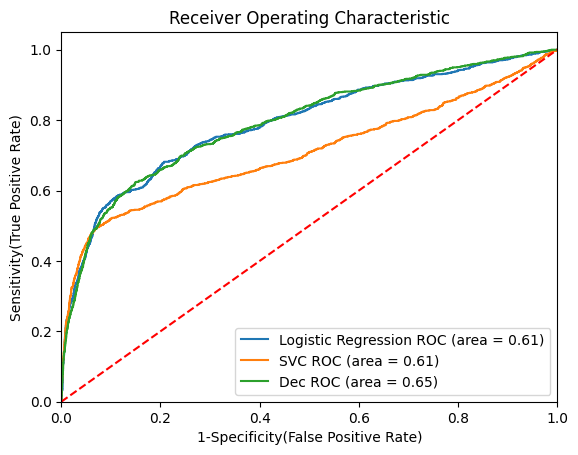

In [32]:
plt.figure()
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='saga', penalty='l1', C= 0.01),
},
{
    'label': 'SVC',
    'model': SVC(kernel= 'rbf', gamma=0.01, C= 10,probability=True),
},
{
    'label': 'GB',
    'model': GradientBoostingClassifier(n_estimators= 288, min_samples_split=2,min_samples_leaf= 2,max_features='auto', max_depth=10, loss='exponential'),
}
]

for m in models:
    model = m['model']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**CONCLUSION**

   From roc-acu curve we can say that best model is logestic regression and gradient boosting classifier

      ---->>  y_test v/s prediction <<----

In [33]:
y_test

1110     0
12662    0
19072    0
10222    0
12167    0
        ..
24465    0
12276    0
36173    1
31335    0
38556    0
Name: subscribed, Length: 9855, dtype: int64

In [34]:
true_y=pd.DataFrame(y_test)
true_y.columns=['Subscribed']
true_y

,Subscribed
1110,0
12662,0
19072,0
10222,0
12167,0
...,...
24465,0
12276,0
36173,1
31335,0


In [37]:
prediction=pd.DataFrame({'y_true':true_y['Subscribed'],'gradient_boosting':y_pred_gb,'logestic regression':y_pred_lr,'svc':y_pred_svc})
prediction

,y_true,gradient_boosting,logestic regression,svc
1110,0,0,0,0
12662,0,0,0,0
19072,0,0,0,0
10222,0,0,0,0
12167,0,0,0,0
...,...,...,...,...
24465,0,0,0,0
12276,0,0,0,0
36173,1,0,1,1
31335,0,0,0,0
